In [1]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;


import Plots
using LaTeXStrings
using Measures
using NPZ
using EllipsisNotation

  Activating project at `~/Projects/birefringence/GSHEIntegrator`


In [155]:
odeopts = GSHEIntegrator.ODESolverOptions(no_loops=true)

geometry = GSHEIntegrator.setup_geometry(Float64;
   rsource=4, θsource=π/2, ϕsource=0,
   robs=25, θobs=0.45π, ϕobs=π, a=0.99, ode_options=odeopts);
ϵs = (10).^LinRange(-3, -1, 100);

In [156]:
Xgeo = GSHEIntegrator.solve_initial(geometry, 0., 2)

2×9 Matrix{Float64}:
 2.74893   1.3913   40.5431  1.35647  …  0.0  -4.61544  2.0  -0.29064
 0.577339  3.87723  35.8771  1.35647     0.0   2.85102  7.0   0.693189

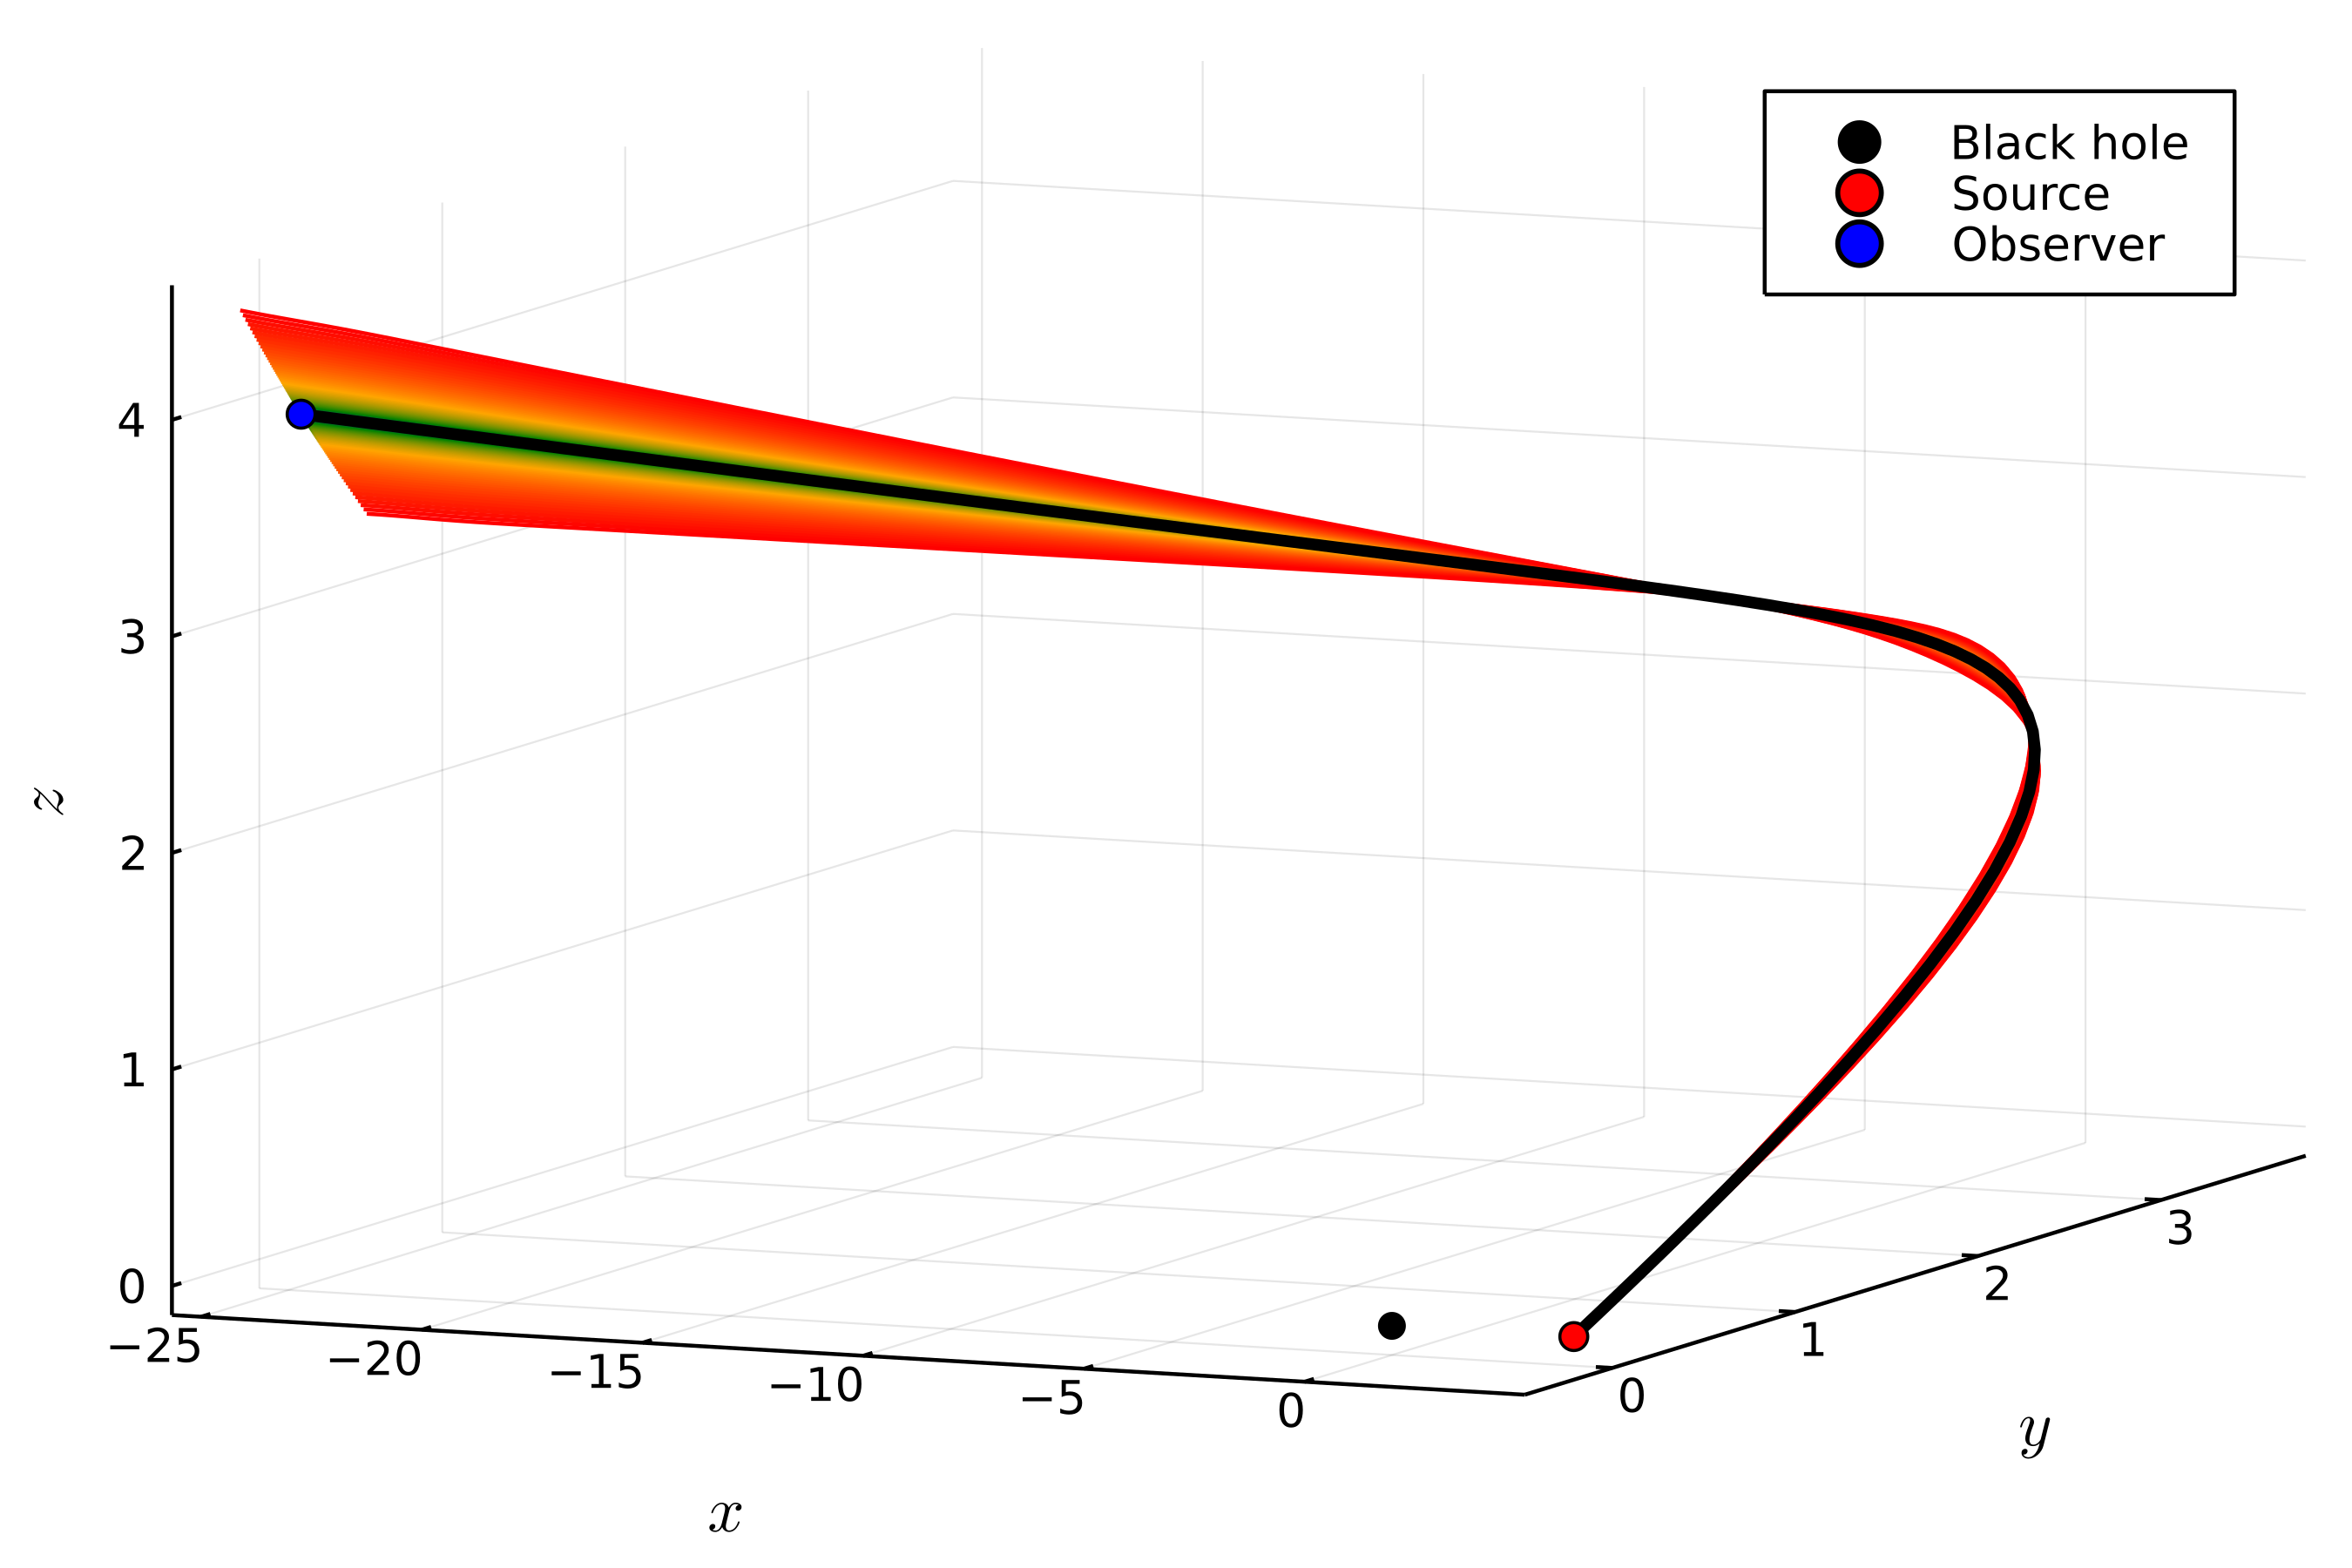

In [157]:
igeo = 2

fig = Plots.plot(dpi=450, xlabel=L"x", ylabel=L"y", zlabel=L"z", figsize=(3.45*2, 3.45*0.75))

cols = Plots.palette(:rainbow, length(ϵs))
for s in [2, -2], j in 1:length(ϵs)
    tr = GSHEIntegrator.cartesiantrajectory(Xgeo[igeo, 1:2], geometry, ϵs[j], s)
    Plots.plot!(fig, [tr[i, :] for i in 1:3]..., label=nothing, c=cols[j])
end

tr = GSHEIntegrator.cartesiantrajectory(Xgeo[igeo, 1:2], geometry, 0, 2)
Plots.plot!(fig, [tr[i, :] for i in 1:3]..., label=nothing, c="black", lw=3)

GSHEIntegrator.plotbh!(fig)
GSHEIntegrator.plot_start_end!(fig, geometry)


# Plots.savefig(fig, "~/Downloads/trajectory_samedirection.png")
display(fig)




In [158]:
Xgshe = GSHEIntegrator.solve_increasing(Xgeo, geometry, ϵs, verbose=false);

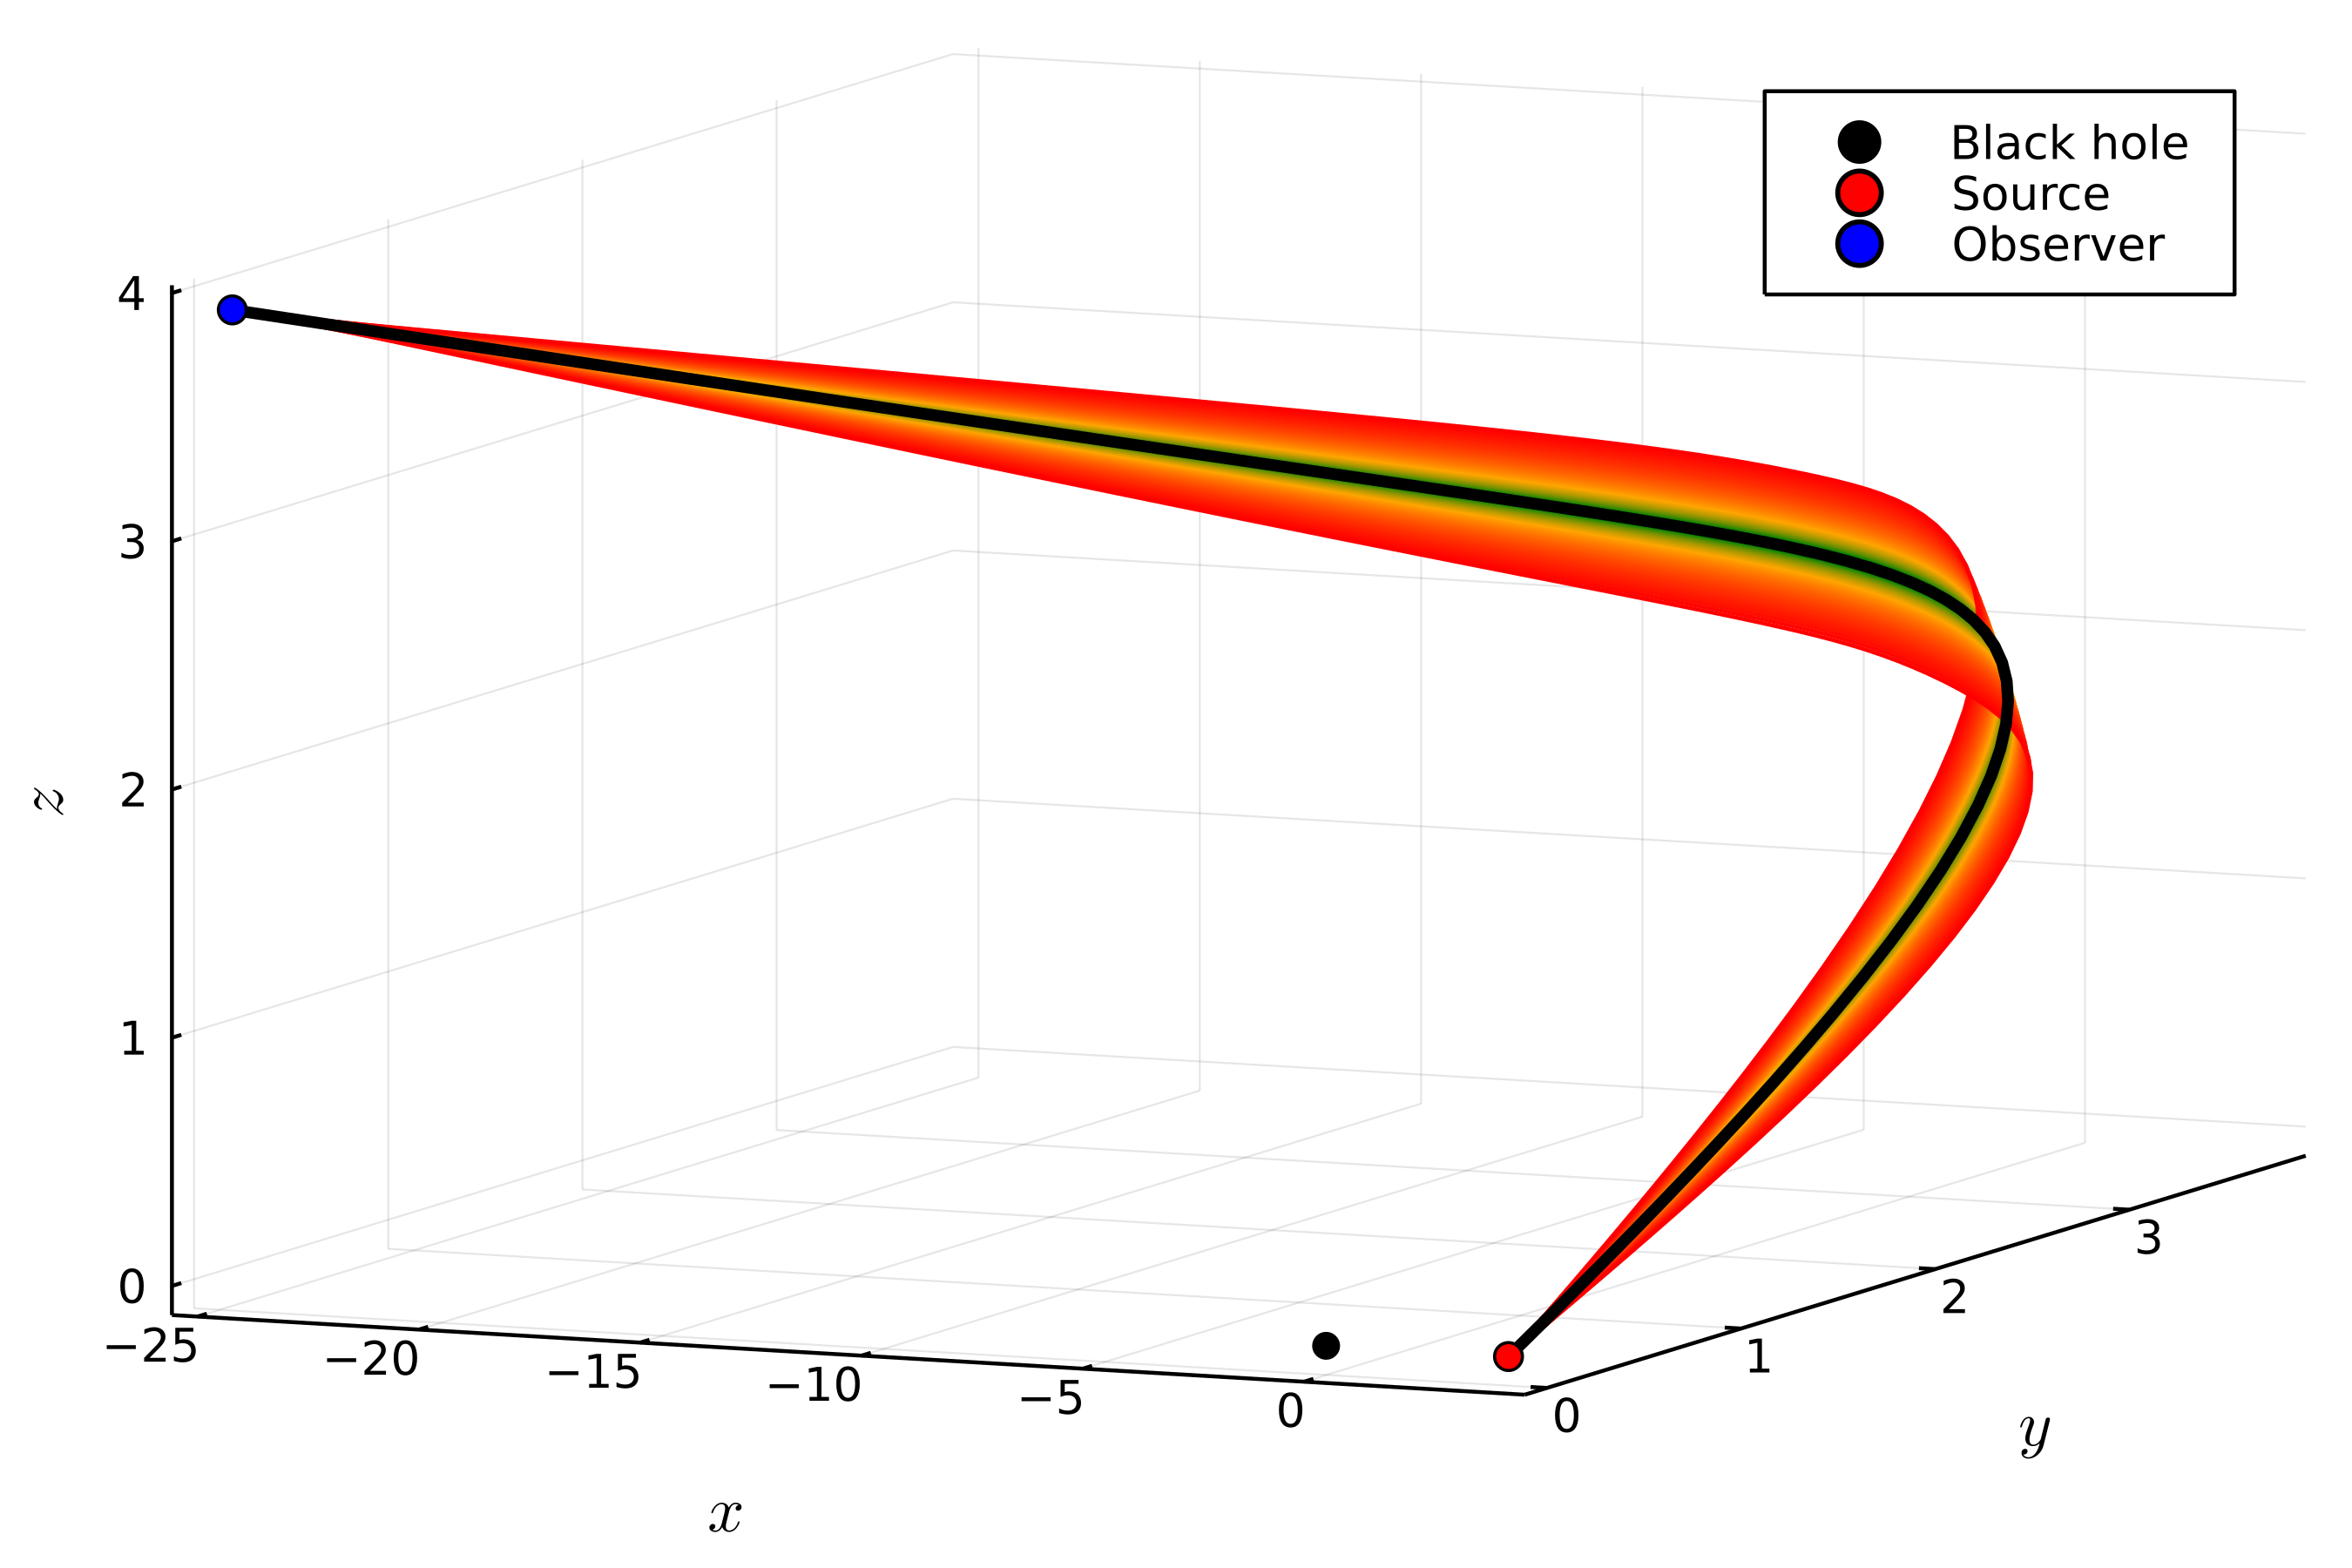

In [159]:
fig = Plots.plot(dpi=450, xlabel=L"x", ylabel=L"y", zlabel=L"z", figsize=(3.45*2, 3.45*0.75))

cols = Plots.palette(:rainbow, length(ϵs))
for s in 1:2, j in 1:length(ϵs)
    tr = GSHEIntegrator.cartesiantrajectory(Xgshe[igeo, s, j, 1:2], geometry, ϵs[j], s == 1 ? 2 : -2)
    Plots.plot!(fig, [tr[i, :] for i in 1:3]..., label=nothing, c=cols[j])
end

tr = GSHEIntegrator.cartesiantrajectory(Xgeo[igeo, 1:2], geometry, 0, 2)
Plots.plot!(fig, [tr[i, :] for i in 1:3]..., label=nothing, c="black", lw=3)

GSHEIntegrator.plotbh!(fig)
GSHEIntegrator.plot_start_end!(fig, geometry)


Plots.savefig(fig, "~/Downloads/trajectory_toobs.png")
display(fig)

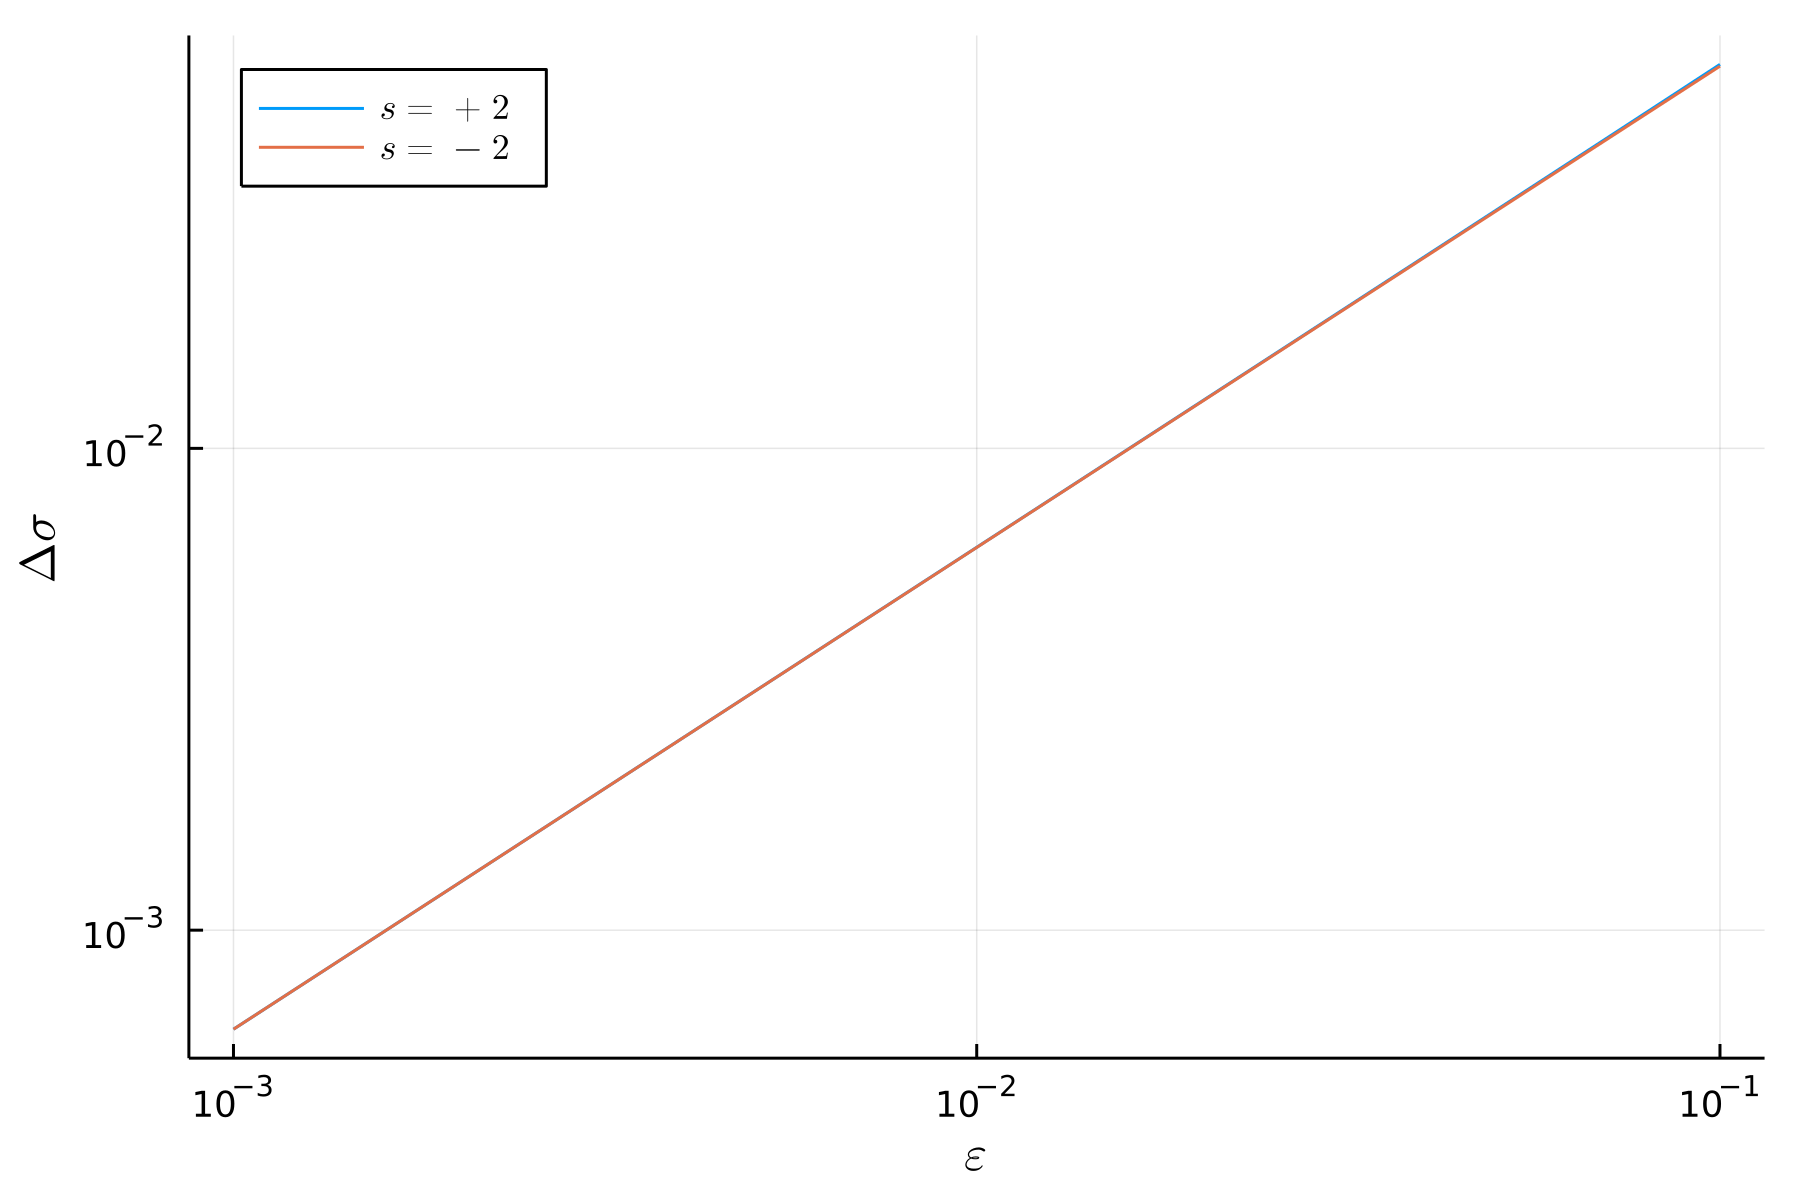

In [174]:
s = 1
fig = Plots.plot(dpi=300, figsize=(3.45, 3.45*0.75), xlabel=L"\epsilon", ylabel=L"\Delta\sigma", scale=:log10,
    legend=:topleft)

for s in 1:2
    if s == 1
        label = L"s = + 2"
    else
        label = L"s = - 2"
    end
    Δσ = [GSHEIntegrator.angdist(Xgshe[igeo, s, j, 1:2], Xgeo[igeo, 1:2]) for j in 1:length(ϵs)]
    Plots.plot!(fig, ϵs, Δσ, label=label)
end

Plots.savefig(fig, "~/Downloads/angdist_eps.pdf")
display(fig)

In [88]:
geometry.direction_coords = :shadow
geometry.ode_options.no_loops = false
N = 500
k2 = LinRange(-1, 1, N)
k3 = LinRange(-1, 1, N)
loss = GSHEIntegrator.setup_initial_loss(geometry, 0, 2);
Z = GSHEIntegrator.grid_evaluate_scalar(loss, k2, k3)
Z = (transpose(Z))

500×500 transpose(::Matrix{Float64}) with eltype Float64:
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
  ⋮                        ⋮             ⋱             ⋮                  
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf

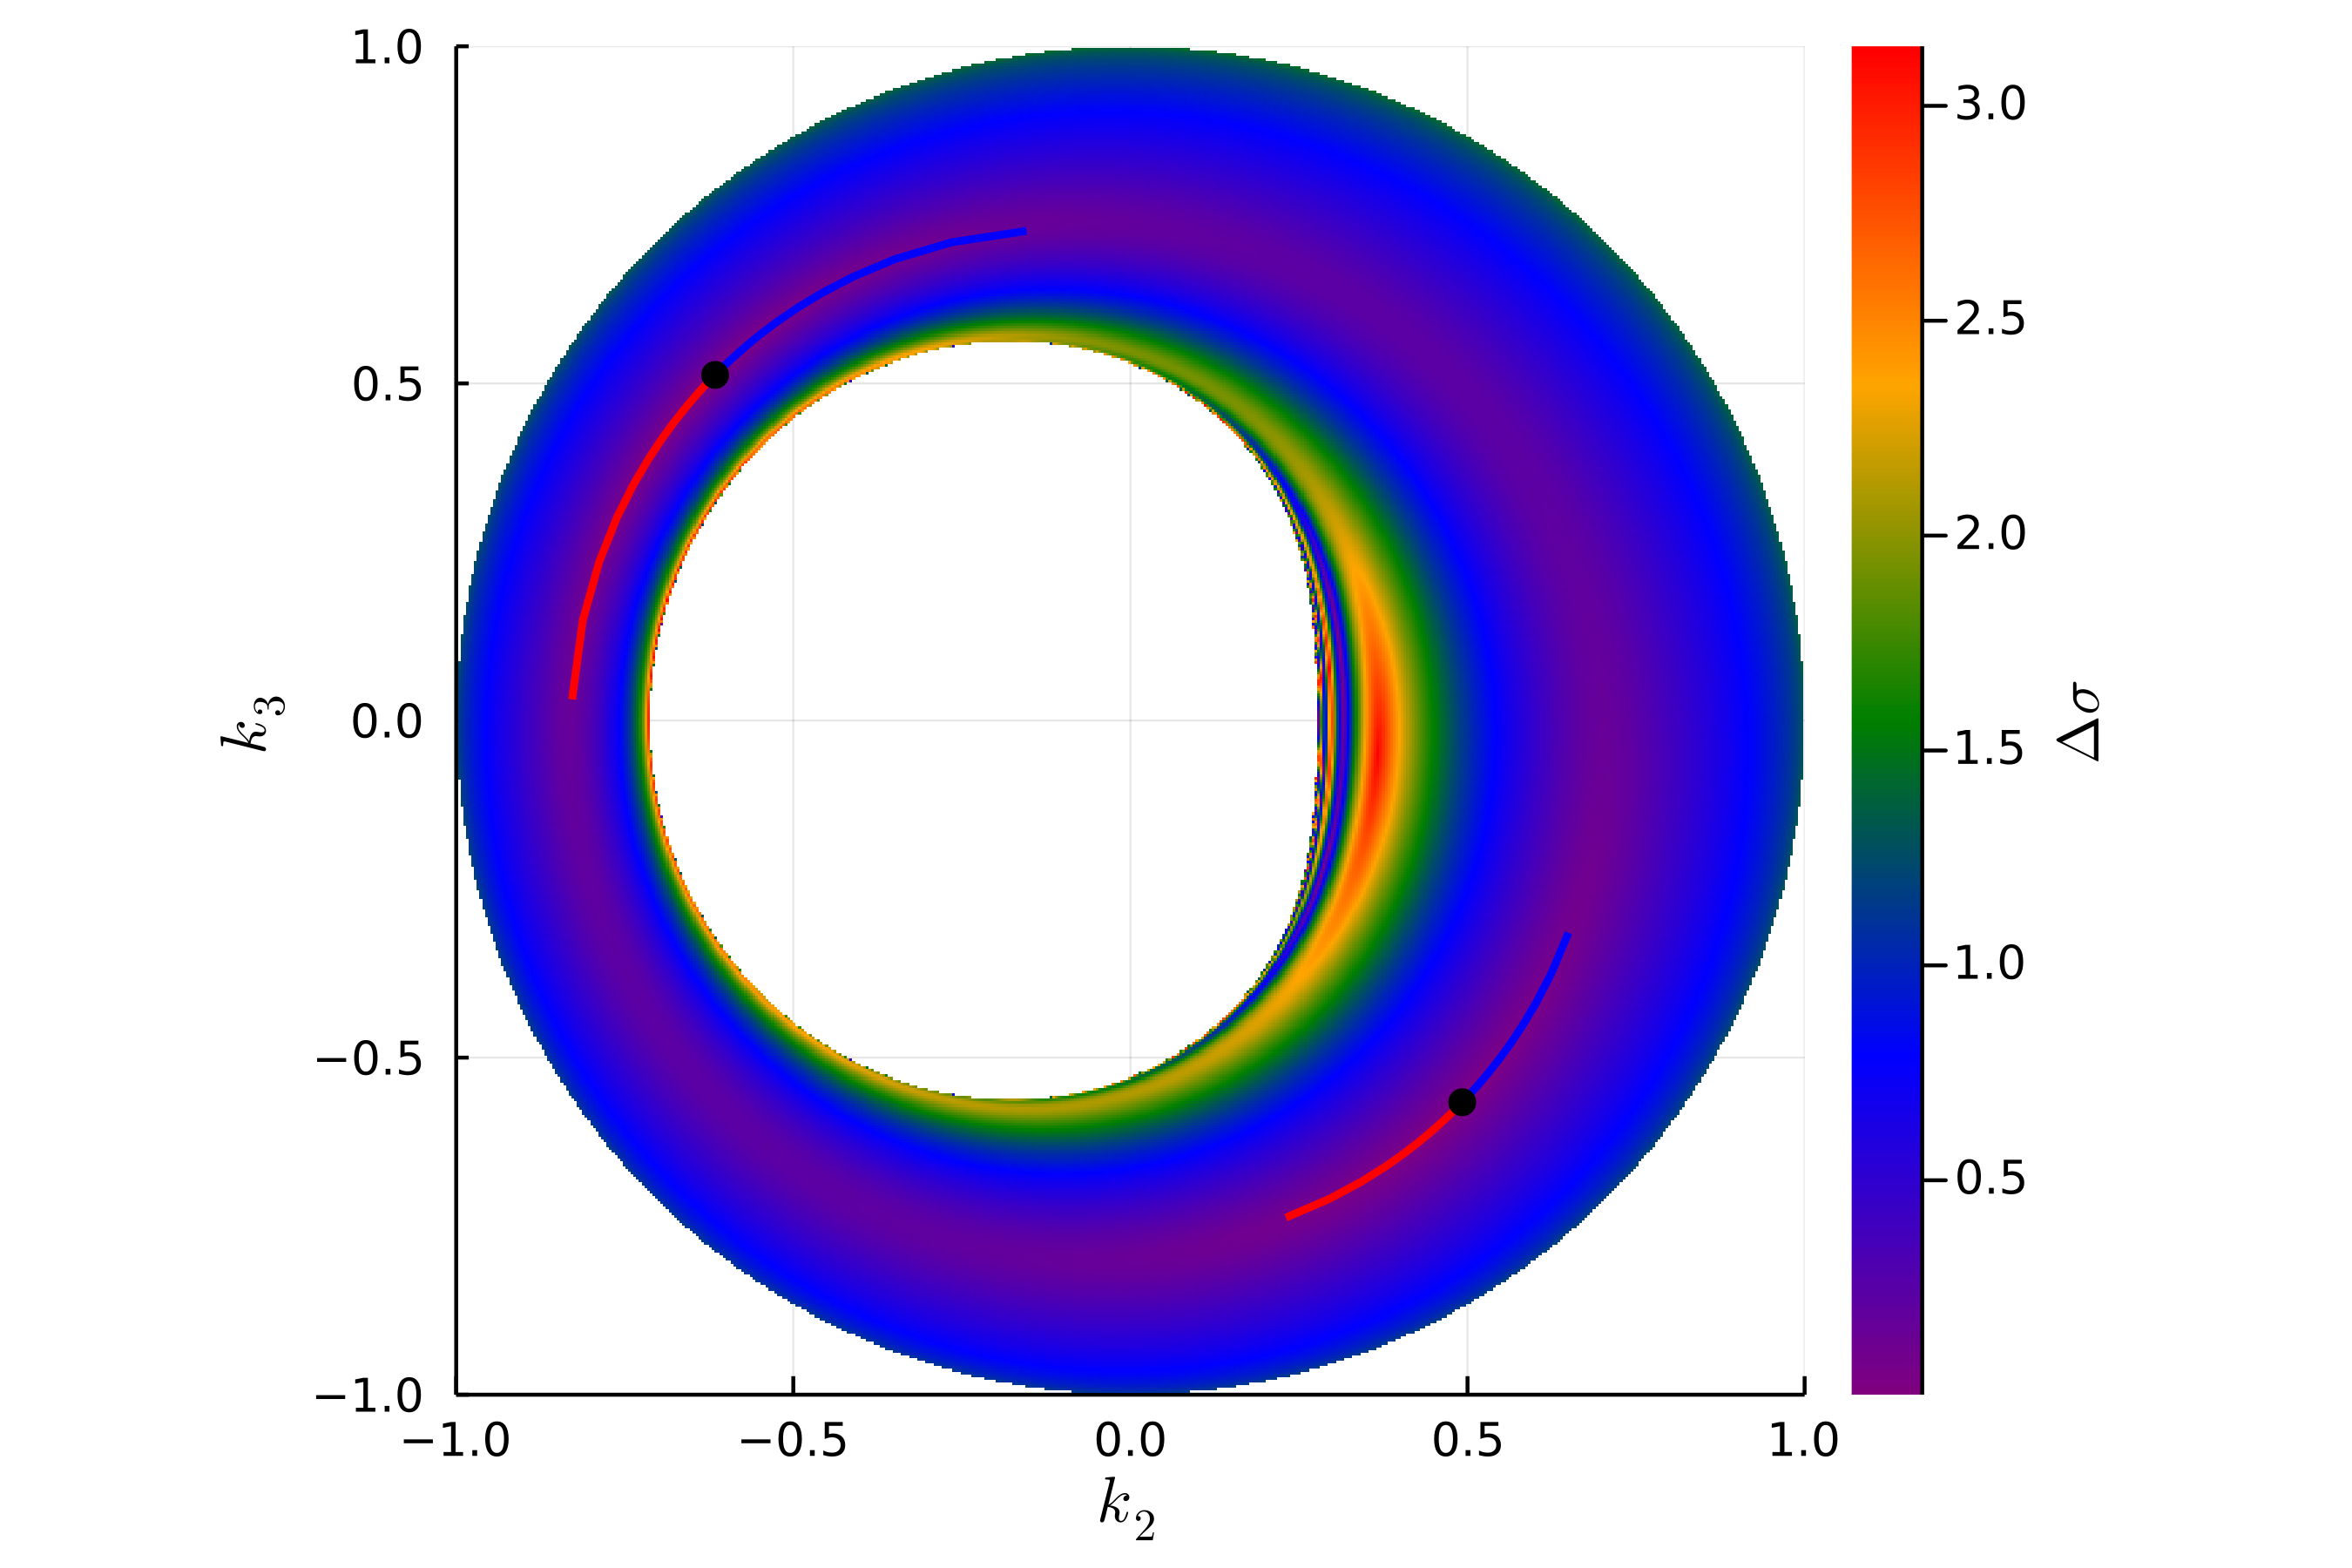

In [90]:
fig = Plots.heatmap(k2, k3, Z, c=:rainbow, dpi=450, aspect_ratio=1, figsize=(3.45, 3.45*0.75),
   xlim=(-1,1), ylim=(-1,1), colorbar_title=L"\Delta\sigma", xlabel=L"k_2", ylabel=L"k_3")


for n in 1:2, s in 1:2
   s == 1 ? (c = :red) : (c =:blue)
   X = mapslices(GSHEIntegrator.angle2shadow, Xgshe[n, s, :, 1:2], dims=2)
   Plots.plot!(fig,  X[:, 2], X[:, 1],c=c, lw=2, label=nothing)
end

X = mapslices(GSHEIntegrator.angle2shadow, Xgeo[:, 1:2], dims=2)
Plots.scatter!(fig, X[:, 2], X[:, 1], c=:black, label=nothing)

Plots.savefig(fig, "~/Downloads/shadow_loss.png")
display(fig)

In [116]:
geometry.direction_coords = :spherical
geometry.ode_options.no_loops = false
N = 300
k2 = LinRange(-1, 1, N)
k3 = LinRange(-1, 1, N)

Z = fill(NaN, N, N)
for i in 1:N, j in 1:N
    dir = [k2[i], k3[j]]
    if sum(dir.^2) ≤ 1
        Z[i, j] = GSHEIntegrator.magnification([k2[i], k3[j]], geometry, 0, 2)
    end
end


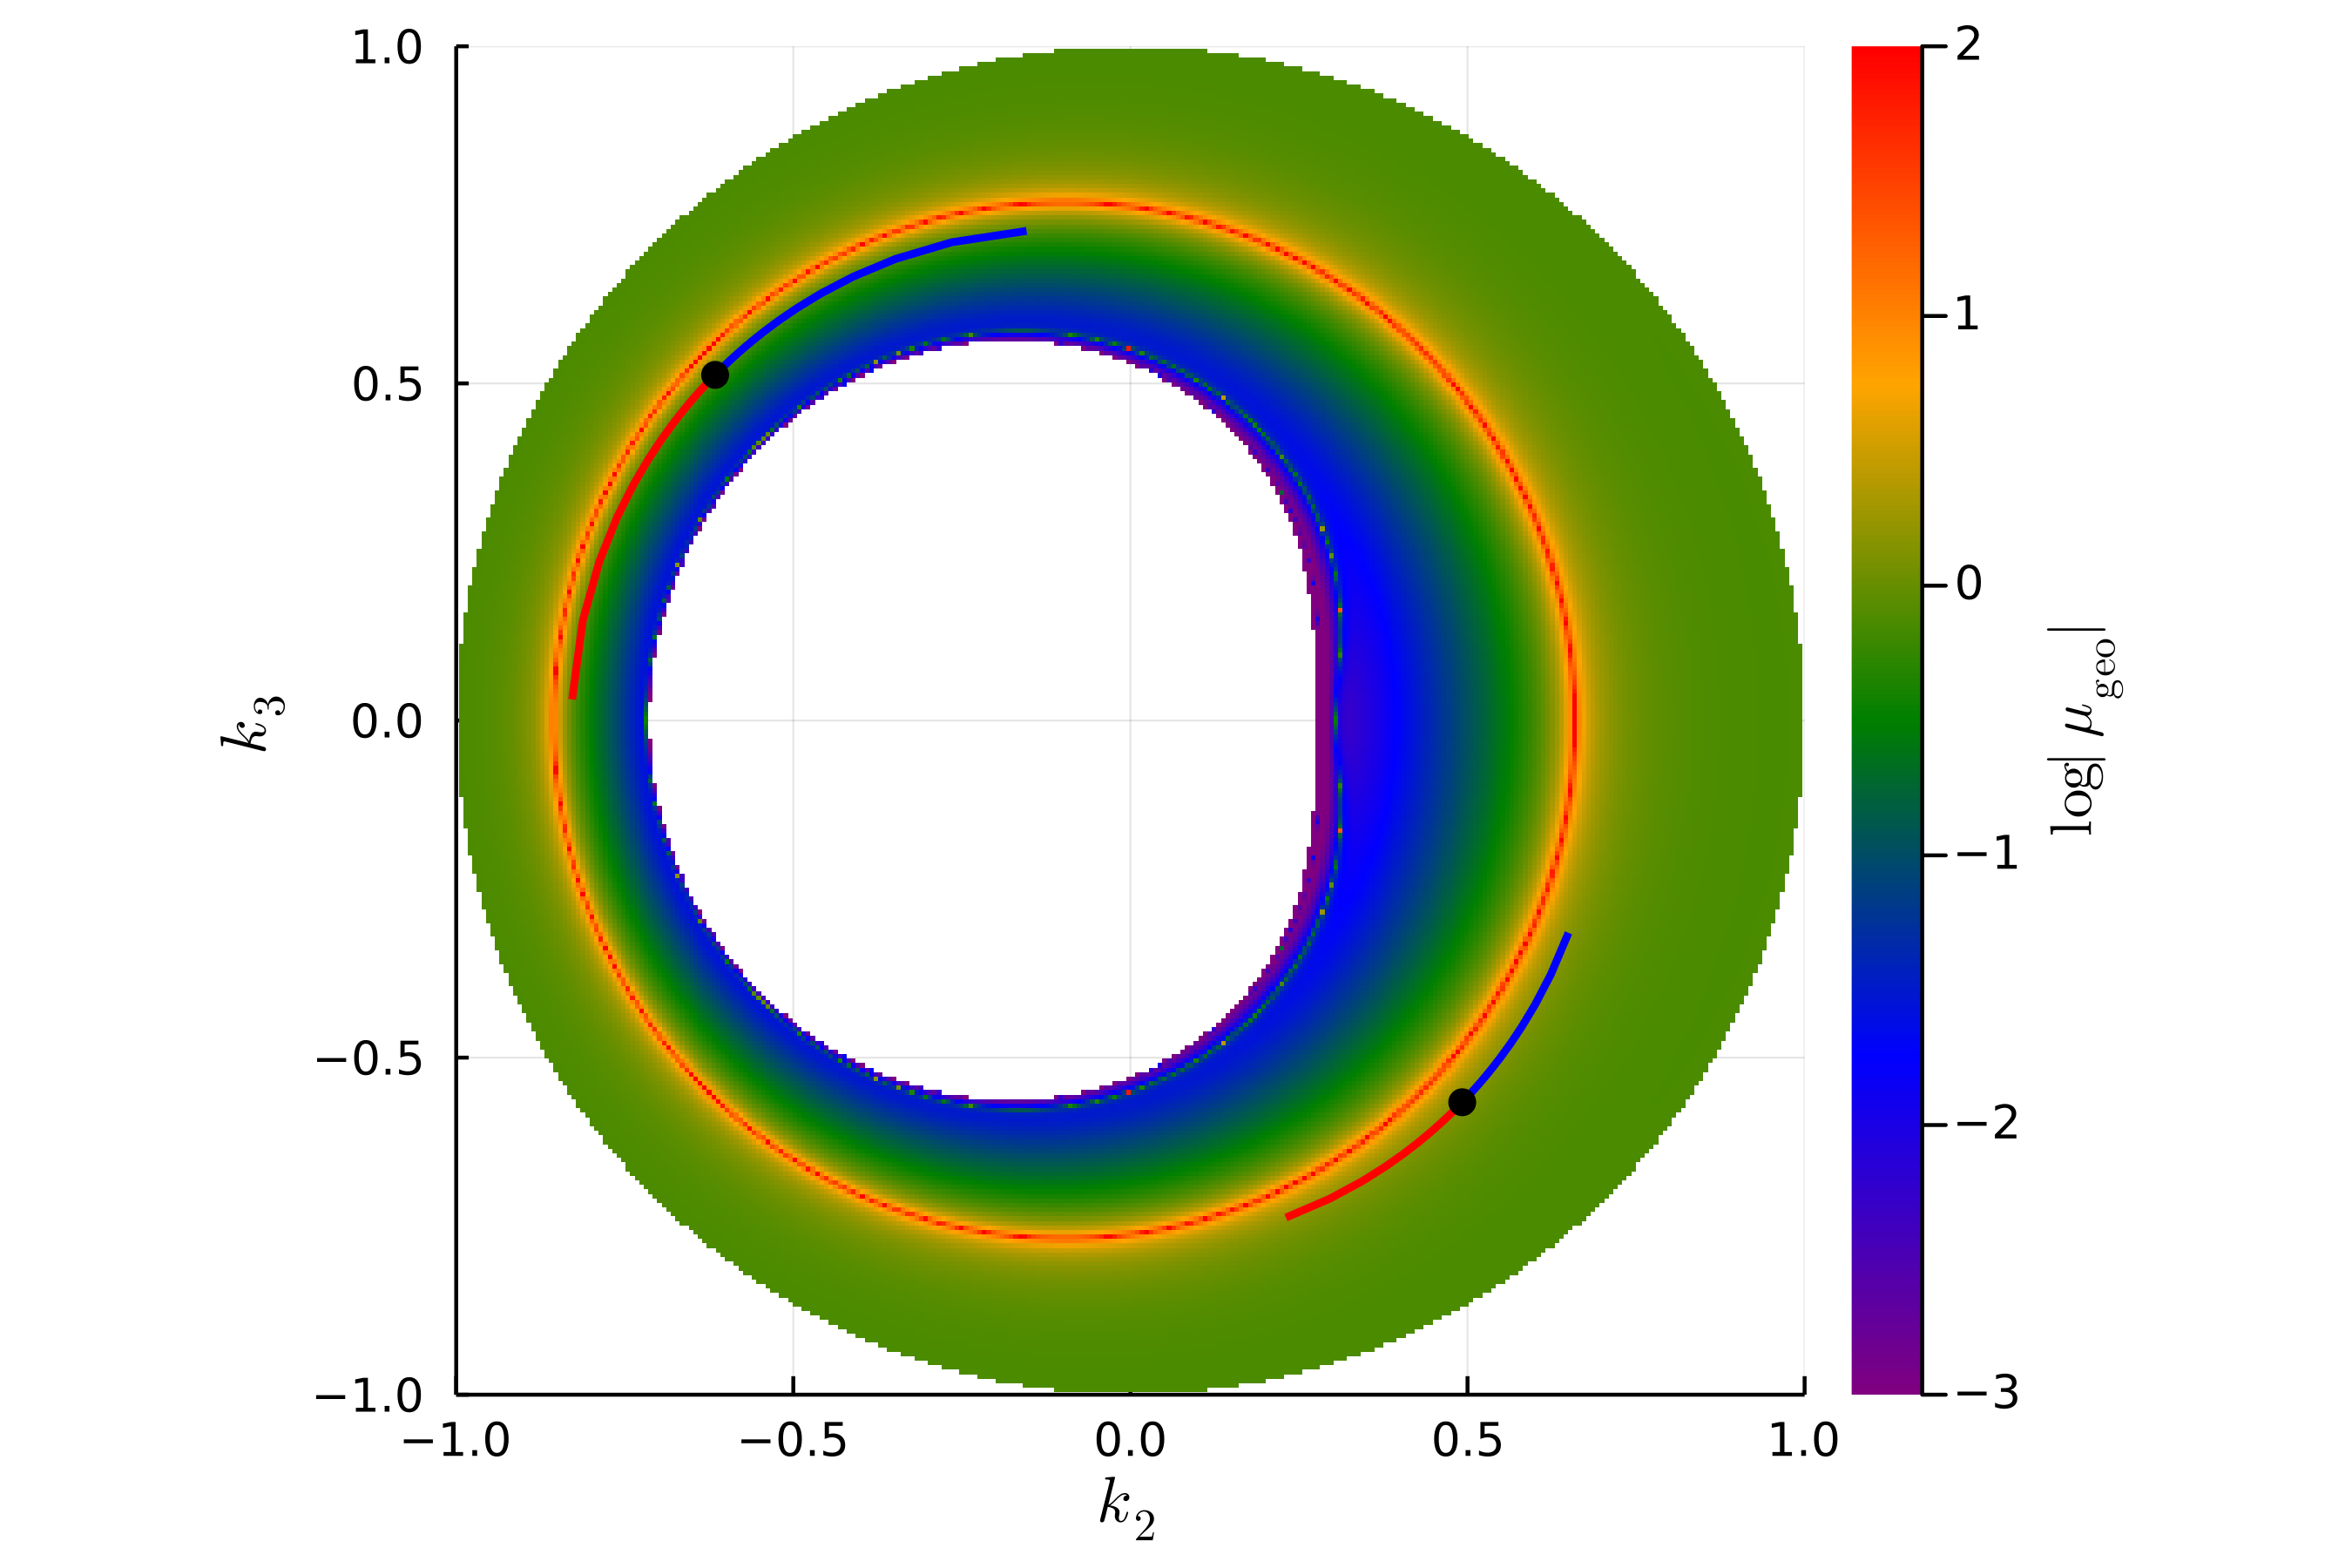

In [144]:
Z2 = log10.(abs.(Z))
fig = Plots.heatmap(k2, k3, Z2, c=:rainbow, dpi=450, aspect_ratio=1, figsize=(3.45, 3.45*0.75),
   xlim=(-1,1), ylim=(-1,1), colorbar_title=L"\log |\mu_{\mathrm{geo}}|", xlabel=L"k_2", ylabel=L"k_3",
   clim=(-3, 2))

for n in 1:2, s in 1:2
   s == 1 ? (c = :red) : (c =:blue)
   X = mapslices(GSHEIntegrator.angle2shadow, Xgshe[n, s, :, 1:2], dims=2)
   Plots.plot!(fig,  X[:, 2], X[:, 1],c=c, lw=2, label=nothing)
end

X = mapslices(GSHEIntegrator.angle2shadow, Xgeo[:, 1:2], dims=2)
Plots.scatter!(fig, X[:, 2], X[:, 1], c=:black, label=nothing)

Plots.savefig(fig, "~/Downloads/magnification_geodesic.png")
display(fig)